In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
computers = pd.read_csv("computers.csv")

In [31]:
minutes_model0 = computers.Minutes.mean()
minutes_model1 = 10 + 12*computers.Units
minutes_model2 = 6 + 18*computers.Units
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2
computers['min_model0']
computers['min_model2']

0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: min_model2, dtype: int64

Text(0.5, 1.0, 'Speculated Models')

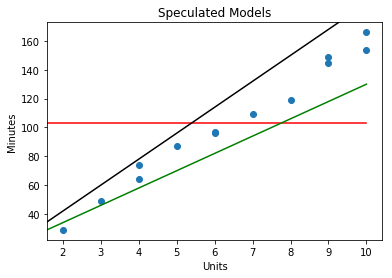

In [6]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers)
ax.add_line(plt.Line2D(computers.Units,computers.min_model0,color="red"))
ax.add_line(plt.Line2D(computers.Units,computers.min_model1,color="green"))
ax.add_line(plt.Line2D(computers.Units,computers.min_model2,color="black"))
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")

In [7]:
model0_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model0,
              computers.min_model0 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [8]:
model0_obs

,Units,Actual time,Predicted time,Error
0,1.0,23.0,97.214286,74.214286
1,2.0,29.0,97.214286,68.214286
2,3.0,49.0,97.214286,48.214286
3,4.0,64.0,97.214286,33.214286
4,4.0,74.0,97.214286,23.214286
5,5.0,87.0,97.214286,10.214286
6,6.0,96.0,97.214286,1.214286
7,6.0,97.0,97.214286,0.214286
8,7.0,109.0,97.214286,-11.785714
9,8.0,119.0,97.214286,-21.785714


In [8]:
sum(model0_obs.Error)

nan

In [9]:
sum(model0_obs.Error**2)

nan

#### Model 1

In [10]:
model1_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model1,
              computers.min_model1 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [11]:
model1_obs

,Units,Actual time,Predicted time,Error
0,1.0,NaN,22.0,NaN
1,2.0,29.0,34.0,5.0
2,3.0,49.0,46.0,-3.0
3,4.0,64.0,58.0,-6.0
4,4.0,74.0,58.0,-16.0
5,5.0,87.0,70.0,-17.0
6,6.0,96.0,82.0,-14.0
7,6.0,97.0,82.0,-15.0
8,7.0,109.0,94.0,-15.0
9,8.0,119.0,106.0,-13.0


In [12]:
sum(model1_obs.Error**2)

nan

#### Model 2

In [13]:
model2_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model2,
              computers.min_model2 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [14]:
model2_obs

,Units,Actual time,Predicted time,Error
0,1.0,NaN,24.0,NaN
1,2.0,29.0,42.0,13.0
2,3.0,49.0,60.0,11.0
3,4.0,64.0,78.0,14.0
4,4.0,74.0,78.0,4.0
5,5.0,87.0,96.0,9.0
6,6.0,96.0,114.0,18.0
7,6.0,97.0,114.0,17.0
8,7.0,109.0,132.0,23.0
9,8.0,119.0,150.0,31.0


In [15]:
sum(model2_obs.Error**2)

nan

#### determining the best fit model 

In [16]:
x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
b1 = numerator/denominator
b0 = ymean - (b1*xmean)
print(b0,b1)

36.319838056680126 11.100539811066131


In [17]:
min_best_fit_model = b0 + b1*computers.Units
computers['min_best_fit_model'] = min_best_fit_model

In [18]:
computers.loc[:,["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,NaN,47.420378
1,2,29.0,58.520918
2,3,49.0,69.621457
3,4,64.0,80.721997
4,4,74.0,80.721997
5,5,87.0,91.822537
6,6,96.0,102.923077
7,6,97.0,102.923077
8,7,109.0,114.023617
9,8,119.0,125.124157


#### Visualizing the Best Fit Model

Text(0.5, 1.0, 'Best fit model line')

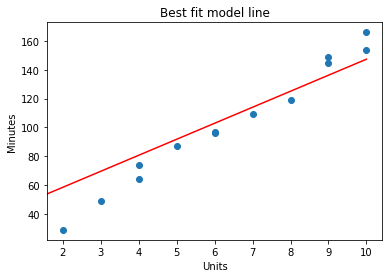

In [19]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers)
ax.add_line(plt.Line2D(computers.Units,computers.min_best_fit_model,color="red"))
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

In [20]:
best_fit_model_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_best_fit_model,
              computers.min_best_fit_model - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [21]:
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1.0,NaN,47.420378,NaN
1,2.0,29.0,58.520918,29.520918
2,3.0,49.0,69.621457,20.621457
3,4.0,64.0,80.721997,16.721997
4,4.0,74.0,80.721997,6.721997
5,5.0,87.0,91.822537,4.822537
6,6.0,96.0,102.923077,6.923077
7,6.0,97.0,102.923077,5.923077
8,7.0,109.0,114.023617,5.023617
9,8.0,119.0,125.124157,6.124157


In [22]:
sum(best_fit_model_obs.Error**2)

nan

#### Best Fit Model using sklearn.linear_model.LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression
computers["Minutes"]=computers["Minutes"].replace({np.NaN:computers["Minutes"].mean()})
computers.Minutes

0     102.923077
1      29.000000
2      49.000000
3      64.000000
4      74.000000
5      87.000000
6      96.000000
7      97.000000
8     109.000000
9     119.000000
10    149.000000
11    145.000000
12    154.000000
13    166.000000
Name: Minutes, dtype: float64

In [42]:
model = LinearRegression()
model.fit(X = computers.loc[:,["Units"]], y= computers.loc[:,["Minutes"]])
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: [30.90283401]
Coefficients: [[12.00337382]]
